In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
current_path = '/content/drive/My Drive/Colab Notebooks/Project_GANder/gankook_cuda/semantic-segmentation-pytorch/'

import os

os.chdir(current_path)
!ls

 ade20k-resnet50dilated-ppm_deepsup
 batch_tensor
 Building_images
 ckpt
'Color Synthetic All_Color.ipynb'
'Color Synthetic All_Color_Shift.ipynb'
'Color Synthetic aws.ipynb'
'Color Synthetic.ipynb'
'Color Synthetic Randomic.ipynb'
 config
 cooperative_scene_parsing
 data
 decoder_tensor_image.png
 demo_test.sh
 download_ADE20K.sh
 DrivingLaneDetection
 DuLa-Net
 edge_tensor
 edge_tensor_image.png
 encoder_tensor_image.png
 eval_multipro.py
 eval.py
 extractRect.py
 info.json
'Layout Estimation by vanishing line Func.ipynb'
'Layout Estimation Func Final.ipynb'
'Layout Estimation Func Final without AI.ipynb'
'Layout Estimation Func.ipynb'
 layout_estimation_func.py
'Layout Estimation.ipynb'
'Layout Estimation without AI.ipynb'
'Layout Estimation without AI kmeans.ipynb'
 LICENSE
 lsun
 lsun-room
 lsun-room-dsc
 mask_data
 mask_layout_data
 mit_semseg
 pretrained
 problem_test_data
 problem_test_result
 __pycache__
 pytorch_refinenet
 pytorch_room_layout
 Pytorch-UNet
 README.md
 refer_d

### Prerequisition

In [3]:
!pip install -r pytorch_room_layout/cv2_requirements.txt

     |████████████████████████████████| 25.4MB 66.9MB/s 
     |████████████████████████████████| 31.2MB 178kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
# !python pytorch_room_layout/segment_lsun.py test -d /mask_data/wall/ -o /mask_layout_data/wall/ -c 4 --arch drn_d_105 -s 320 --resume pytorch_room_layout/lsun.pth.tar --phase test --batch-size 1 --ms

### Synthetic Image

[Errno 17] File exists: './syn_result/wall/'
refer_image : blue-with-vignette-marble-texture-background-with-copy-space_23-2148327728.jpg
[Errno 17] File exists: './syn_result/wall/720x480_20191213152221585_scULGztwnF/'
mask : 720x480_20191213152221585_scULGztwnF.png


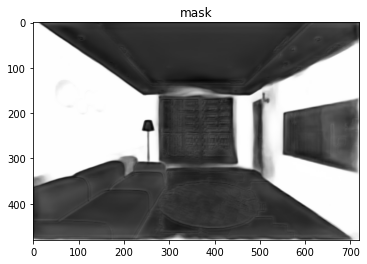

scale_factor : 6


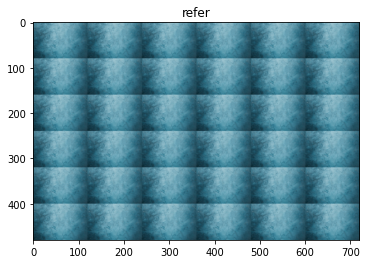

mask_img.shape : (480, 720, 3)


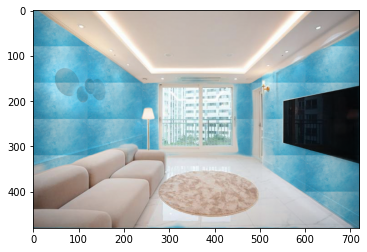

[Errno 17] File exists: './syn_result/wall/720x480_20191209170528058_vI0rkKwmxP/'
mask : 720x480_20191209170528058_vI0rkKwmxP.png


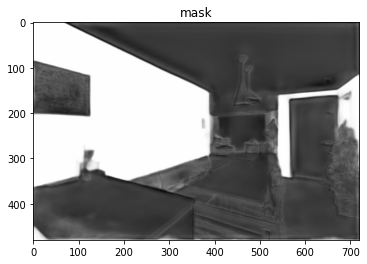

scale_factor : 6


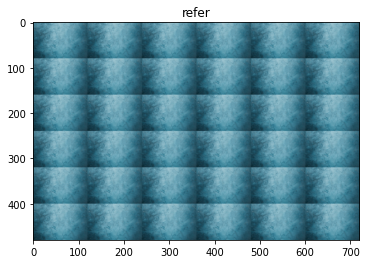

mask_img.shape : (480, 720, 3)


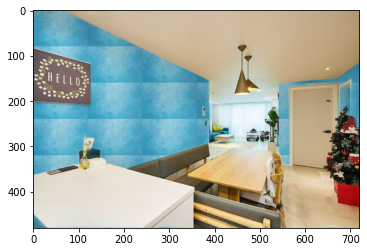

[Errno 17] File exists: './syn_result/wall/720x480_20190315154538242_cqtFKEk4r5/'
mask : 720x480_20190315154538242_cqtFKEk4r5.png


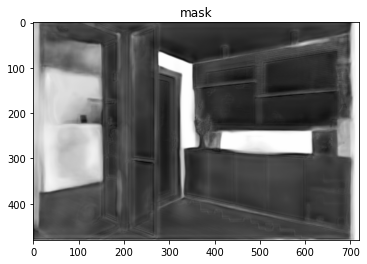

scale_factor : 6


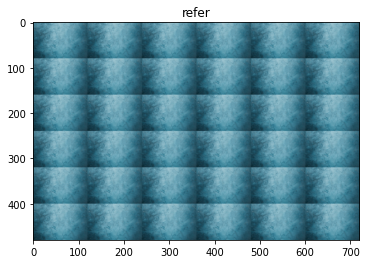

mask_img.shape : (480, 720, 3)


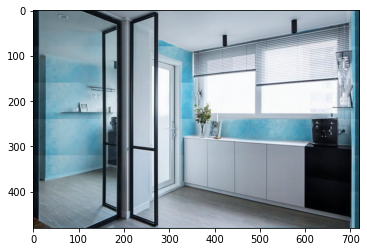

[Errno 17] File exists: './syn_result/wall/720x480_20200131153356598_gnIdiy35s8/'
mask : 720x480_20200131153356598_gnIdiy35s8.png


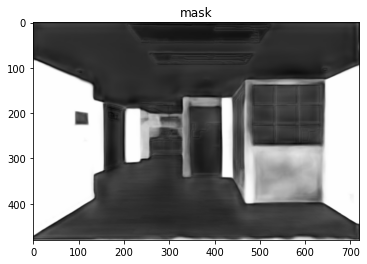

scale_factor : 6


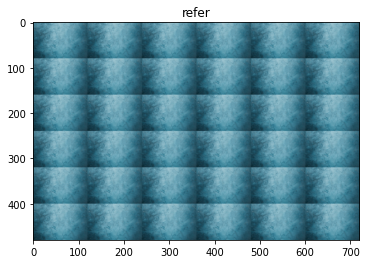

mask_img.shape : (480, 720, 3)


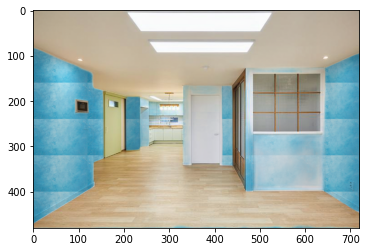

[Errno 17] File exists: './syn_result/wall/720x480_20191004110915620_aVLsnTL8a4/'
mask : 720x480_20191004110915620_aVLsnTL8a4.png


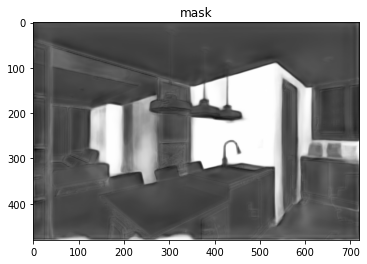

scale_factor : 6


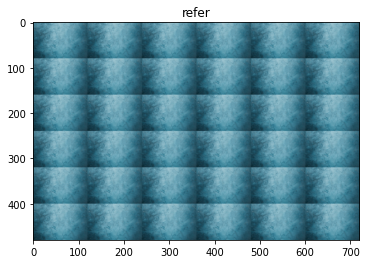

mask_img.shape : (480, 720, 3)


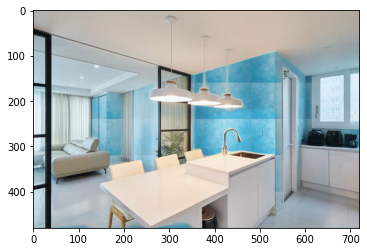

[Errno 17] File exists: './syn_result/wall/720x480_20191113144107524_mkDq5m7ELP/'
mask : 720x480_20191113144107524_mkDq5m7ELP.png


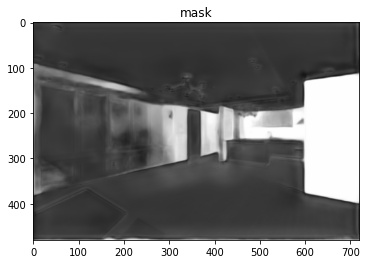

scale_factor : 6


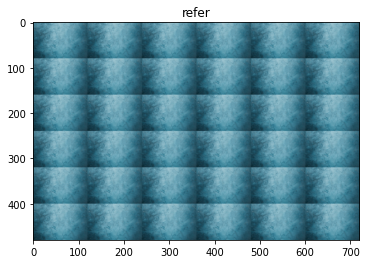

mask_img.shape : (480, 720, 3)


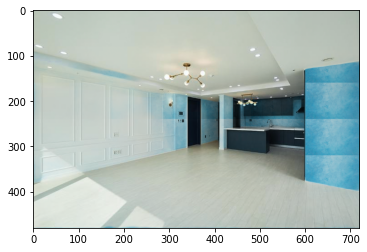

[Errno 17] File exists: './syn_result/wall/720x480_20200622172347224_rbm4sFpQyl/'
mask : 720x480_20200622172347224_rbm4sFpQyl.png


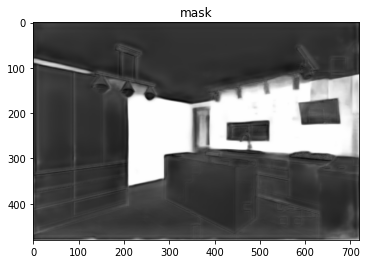

scale_factor : 6


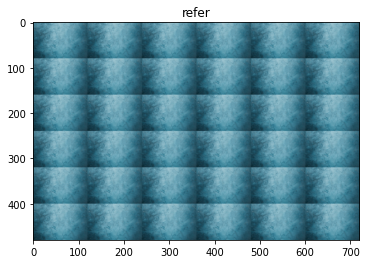

mask_img.shape : (480, 720, 3)


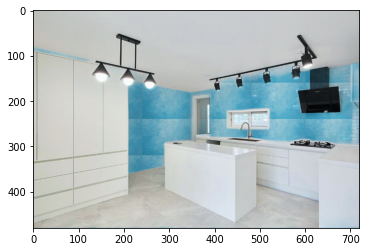

[Errno 17] File exists: './syn_result/wall/720x480_20190219162540169_bnvKQG536n/'
mask : 720x480_20190219162540169_bnvKQG536n.png


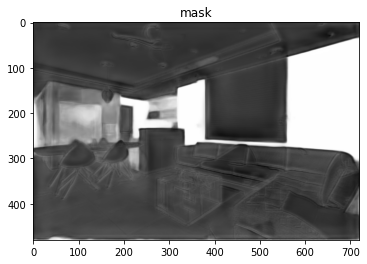

KeyboardInterrupt: ignored

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import os
import layout_estimation_func


def min_max_scale(x):

  scaled_x = (x - x.min()) / (x.max() - x.min())
  return scaled_x

object_ = 'wall'

#     Image Version     #
# mask_path = './test_result/' + object_ + '/'
mask_path = './mask_data/' + object_ + '/'
# layout_path = './test_layout_result/' + object_ + '/'
layout_path = './mask_layout_data/' + object_ + '/'
refer_path = './refer_data/' + object_ + '/'
# refer_path = './refer_data/' + object_ + '/' + 'scaled/'
save_path = mask_path.replace('mask_data', 'syn_result')

#     Video Version     #
# mask_path = './video_result/4/' + object_ + '/'
# refer_path = './refer_data/' + object_ + '/'
# # refer_path = './refer_data/' + object_ + '/' + 'scaled/'
# save_path = mask_path.replace('video_result', 'video_syn_result')

refer_shift = False

try:
  os.makedirs(save_path)

except Exception as e:
  print(e)


mask_list = list()
rand_refer_list = [random.choice(os.listdir(refer_path)) for i in range(5)]
# for index, refer_image in enumerate(rand_refer_list):
for index, refer_image in enumerate(os.listdir(refer_path)):
  # refer_image = 'C.jpg'
  if os.path.isdir(refer_path + refer_image):
    continue
  print('refer_image :', refer_image)

  for mask in (os.listdir(mask_path)):
    # mask = '10-Amazing-Wall-Texture-Designs-To-Revive-Your-Living-Room-1024x640.png'

    new_save_path = save_path + mask.replace('.png', '') + '/'
    try:
      os.makedirs(new_save_path)
    
    except Exception as e:
      print(e)

    if os.path.isdir(mask_path + mask):
      continue
    print('mask :', mask)

    image = Image.open(mask_path + mask)
    org, mask_img = np.split(np.array(image), 2, axis=1)
    # print(org.shape, mask_img.shape)


    #       Refer Shifting    #
    scene_point = [142, 235, 305, 380]
    if refer_shift:
      frame_num = int(mask.split('.')[0])
      if frame_num < scene_point[0]:
        final_img = Image.fromarray(org)
        final_img.save(save_path + '%s_' % index + mask.replace('png', 'jpg'))
        continue
      elif frame_num < scene_point[1]:
        refer_image = '6243_shop1_874961.jpg'
      elif frame_num < scene_point[2]:
        refer_image = '88781319-square-parquet-seamless-floor-pattern.jpg'
      elif frame_num < scene_point[3]:
        refer_image = '6246_shop1_231495.jpg'
      else:
        refer_image = 'Free-floor-textures-gallery-5.jpg'
    # mask_img = min_max_scale(mask_img)
    plt.imshow(mask_img)
    plt.title('mask')
    plt.show()

    img_size = (mask_img.shape[1], mask_img.shape[0])

    # layout = Image.open(layout_path + mask)
    refer = Image.open(refer_path + refer_image)
    
    scale_factor = 6
    print('scale_factor :', scale_factor)
    # refer = refer.resize(img_size)

    #             Use refering            #
    #       org, layout_img, refer 's type = ndarray        #

    #     refer_size와 img_size가 동일하거나 refer_size가 작은 경우를 고려해야한다.     #
    refer = np.tile(refer, (scale_factor, scale_factor, 1))
    size_ratio = math.floor(min((refer.shape[0] / (org.shape[0] * 1.5)), (refer.shape[1] / (org.shape[1] * 1.5))))
    refer = Image.fromarray(refer).resize((int(refer.shape[1] / size_ratio), int(refer.shape[0] / size_ratio)))
    # refer = Image.fromarray(refer).resize((org.shape[1], org.shape[0]))

    if object_ == 'wall':
      refer = layout_estimation_func.refering(org, layout, refer)

    plt.imshow(refer)
    plt.title('refer')
    plt.show()

    #     refer_image Warping     #
    #          Find Max Height Contour Point       #
    if object_ is not 'wall':

      mask_img_gr = mask_img[:mask_img.shape[0] - 10, :mask_img.shape[1] - 10]
      gray = cv2.cvtColor(mask_img_gr, cv2.COLOR_RGB2GRAY)
      # gray = cv2.cvtColor(mask_img.astype(np.float32), cv2.COLOR_RGB2GRAY) * 255
      ret, thr = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
      contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
      # print(contours.shape)

      if object_ == 'floor':
        max_height_point = np.array([[mask_img.shape[0], mask_img.shape[1]]])
        # print(max_height_point)
        for contour in contours:
          # print(contour.shape)
          for point in contour:
            # print(point[0][1], max_height_point[0][1])
            if 0 < point[0][1] <= max_height_point[0][1]:
              # print(max_height_point[0][1])
              max_height_point = point
            # print(point)
            # break
          # ctr = contour.astype(np.int32)
          # cv2.drawContours(mask_img, [ctr], -1, (255, 0, 0), 5)
        
        #       Warping       #
        pts1 = np.float32([max_height_point[0], [0, gray.shape[1]], [gray.shape[0], gray.shape[1]]])
        pts2 = np.float32([[max_height_point[0][0], 0], [0, gray.shape[1]], [gray.shape[0], gray.shape[1]]])

      elif object_ == 'ceiling':
        max_height_point = np.array([[0, 0]])
        # print(max_height_point)
        for contour in contours:
          # print(contour.shape)
          for point in contour:
            # print(point[0][1], max_height_point[0][1])
            if point[0][1] >= max_height_point[0][1]:
              # print(max_height_point[0][1])
              max_height_point = point
            # print(point)
            # break
          # ctr = contour.astype(np.int32)
          # cv2.drawContours(mask_img, [ctr], -1, (255, 0, 0), 5)
        
        #       Warping       #
        pts1 = np.float32([max_height_point[0], [0, 0], [gray.shape[0], 0]])
        pts2 = np.float32([[max_height_point[0][0], gray.shape[1]], [0, 0], [gray.shape[0], 0]])

      matrix = cv2.getAffineTransform(pts2, pts1)

      refer = np.asarray(refer)
      refer = cv2.warpAffine(refer, matrix, (refer.shape[1], refer.shape[0]))

    # plt.imshow(refer)
    # plt.show()
    # break
    print('mask_img.shape :', mask_img.shape)
    mask_img = mask_img / 255.

    #     1.wall_mask * reference color image + (1 - wall_mask) * original_image)    #
    syn_ = mask_img * (refer) + (1 - mask_img) * org
    syn = mask_img * syn_ + (1 - mask_img) * org

    # syn = mask_img * (0.5 * np.array(refer) + 0.5 * org) + (1 - mask_img) * org
    # print(syn.max(), syn.min())
    # print(syn.shape)
    
    #       Brightness Reservation      #
    #     2.1st result's hsv('value') channel = w * wall_mask * reference hsv('value') + (1 - w) * (1 - wall_mask) * 1st hsv('value')
    org_hsv = cv2.cvtColor(np.uint8(org), cv2.COLOR_RGB2HSV)
    refer_hsv = cv2.cvtColor(np.uint8(refer), cv2.COLOR_RGB2HSV)
    syn_hsv = cv2.cvtColor(np.uint8(syn), cv2.COLOR_RGB2HSV)


    hsv_added = cv2.addWeighted(org, 0.7, org_hsv, 0.3, 0)
    kernel_size, low_threshold, high_threshold = 5, 0, 150
    hsv_added = cv2.GaussianBlur(hsv_added, (kernel_size, kernel_size), 0)
    hsv_added = cv2.Canny(hsv_added, low_threshold, high_threshold)
    hsv_added = np.invert(hsv_added)

    # plt.imshow(hsv_added)
    # plt.show()

    org_h, org_s, org_v = cv2.split(org_hsv)
    refer_h, refer_s, refer_v = cv2.split(refer_hsv)
    syn_h, syn_s, syn_v = cv2.split(syn_hsv)

    # mask_img = cv2.cvtColor(np.uint8(mask_img), cv2.COLOR_RGB2GRAY)
    # print(mask_img.shape)
    # print(refer_v.shape)
    # print(syn_v.shape)
    # final_syn_hsv = cv2.merge([syn_h, syn_s, syn_v])
    # plt.imshow(np.hstack((syn_h, syn_s, syn_v)))
    # plt.show()
    # plt.imshow(np.hstack((org_h, org_s, org_v)))

    w = .5
    # print(syn_v.min(), syn_v.max())
    # syn_v = w * mask_img * refer_v + (1 - w) * (1 - mask_img) * org_v
    prev_syn_v = syn_v.copy()
    syn_v_im = w * syn_v + (1 - w) * org_v
    syn_v = w * syn_v_im + (1 - w) * org_v
    # syn_v = mask_img * syn_v * k + (1 - mask_img) * org_v
    syn_v = syn_v.astype(np.uint8)
    # print(syn_v.min(), syn_v.max())

    # prev_syn_h = syn_h.copy()
    # syn_h = w * syn_h + (1 - w) * org_h
    # syn_h = syn_h.astype(np.uint8)

    # syn_s = w * syn_s + (1 - w) * org_s
    # syn_s = syn_s.astype(np.uint8)


    # prev_syn_s = syn_s.copy()
    # syn_s = w * syn_s + (1 - w) * org_s
    # syn_s = syn_s.astype(np.uint8)

    # print(syn_h.dtype)
    # print(syn_s.dtype)
    # print(syn_v.dtype)
    im_syn_hsv = cv2.merge([syn_h, syn_s, syn_v_im.astype(np.uint8)])
    im_syn = cv2.cvtColor(im_syn_hsv, cv2.COLOR_HSV2RGB)

    final_syn_hsv = cv2.merge([syn_h, syn_s, syn_v])
    final_syn = cv2.cvtColor(final_syn_hsv, cv2.COLOR_HSV2RGB)

    # plt.imshow(np.hstack((org, syn_hsv, np.uint8(syn))))
    # # plt.imshow(mask_img)
    # # plt.imshow(cv2.add(org, np.invert(mask_img)))
    # plt.imshow(syn_hsv)
    # plt.show()

    # plt.imshow(org_v)
    # plt.imshow(np.hstack((prev_syn_v, syn_v)))
    # plt.imshow(np.hstack((syn_hsv, final_syn_hsv)))
    # plt.imshow(mask_img * 255)

    # plt.figure(figsize=(15, 10))
    # plt.imshow(np.hstack((org, np.uint8(syn_), np.uint8(syn), im_syn, final_syn)))

    plt.imshow(final_syn)
    # plt.imshow(np.hstack((org, final_syn)))

    # print(syn.shape)
    # print(syn_h.shape)
    # plt.imshow(np.hstack((syn_h, syn_s, syn_v)))
    # plt.imshow(cv2.merge((syn_h, syn_s, syn_v)))


    # plt.imshow(refer)
    # plt.imshow(1 - mask_img)
    # plt.axis('off')
    plt.show()
    # plt.savefig(save_path + '%s_' % index + mask.replace('png', 'jpg'))

    # if index == 0:
    #   org_img = Image.fromarray(org)
    #   org_img.save(new_save_path + mask.replace('png', 'jpg'))
    # final_img = Image.fromarray(final_syn)
    # final_img.save(new_save_path + '%s_' % index + mask.replace('png', 'jpg'))

    # break
  break

### Image to Video

In [ ]:
import cv2
import numpy as np
import glob
import os


video_path = 'video_syn_result/4/floor/'
 
image_list = glob.glob(video_path + '*.jpg')
img_array = []
for i in range(len(image_list)):
  try:
    filename = video_path + '0_%s.0.jpg' % (i + 1)
    print('filename:', filename)
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

  except:
    pass
 
 
out = cv2.VideoWriter(video_path.replace('floor/', '') + 'syned_video.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

filename: video_syn_result/4/floor/0_1.0.jpg
filename: video_syn_result/4/floor/0_2.0.jpg
filename: video_syn_result/4/floor/0_3.0.jpg
filename: video_syn_result/4/floor/0_4.0.jpg
filename: video_syn_result/4/floor/0_5.0.jpg
filename: video_syn_result/4/floor/0_6.0.jpg
filename: video_syn_result/4/floor/0_7.0.jpg
filename: video_syn_result/4/floor/0_8.0.jpg
filename: video_syn_result/4/floor/0_9.0.jpg
filename: video_syn_result/4/floor/0_10.0.jpg
filename: video_syn_result/4/floor/0_11.0.jpg
filename: video_syn_result/4/floor/0_12.0.jpg
filename: video_syn_result/4/floor/0_13.0.jpg
filename: video_syn_result/4/floor/0_14.0.jpg
filename: video_syn_result/4/floor/0_15.0.jpg
filename: video_syn_result/4/floor/0_16.0.jpg
filename: video_syn_result/4/floor/0_17.0.jpg
filename: video_syn_result/4/floor/0_18.0.jpg
filename: video_syn_result/4/floor/0_19.0.jpg
filename: video_syn_result/4/floor/0_20.0.jpg
filename: video_syn_result/4/floor/0_21.0.jpg
filename: video_syn_result/4/floor/0_22.0.j

### Warp Affine

In [ ]:
import imutils

for mask in os.listdir(wall_mask_path):
  # print(mask)

  # mask_img = cv2.imread(wall_mask_path + mask)
  mask_img = Image.open(wall_mask_path + mask)
  org, mask_img = np.split(np.array(mask_img), 2, axis=1)
  mask_img = mask_img[:mask_img.shape[0] - 10, :mask_img.shape[1] - 10]
  # plt.imshow(mask_img)
  # plt.show()

  gray = cv2.cvtColor(mask_img, cv2.COLOR_RGB2GRAY)
  # gray = cv2.cvtColor(mask_img.astype(np.float32), cv2.COLOR_RGB2GRAY) * 255
  ret, thr = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
  # thr = thr.astype(np.uint8)
  # print(thr.shape)
  # print(thr.dtype)
  # print(thr.max())
  # print(thr.astype(np.uint8))

  contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  # print(contours.shape)

  #          Find Max Height Contour Point       #
  max_height_point = np.array([[mask_img.shape[0], mask_img.shape[1]]])
  # print(max_height_point)
  for contour in contours:
    # print(contour.shape)
    for point in contour:
      # print(point[0][1], max_height_point[0][1])
      if 0 < point[0][1] <= max_height_point[0][1]:
        # print(max_height_point[0][1])
        max_height_point = point
      # print(point)
      # break
    ctr = contour.astype(np.int32)
    cv2.drawContours(mask_img, [ctr], -1, (255, 0, 0), 5)
    # hull = cv2.convexHull(contour, clockwise=False)
    # cv2.drawContours(mask_img, [hull], -1, (255, 0, 0), 5)
    # break
  # print(max_height_point)
  cv2.circle(mask_img, (max_height_point[0][0], max_height_point[0][1]), 10, (255, 255, 0), -1)

  # x, y, w, h = cv2.boundingRect(contours[0])
  # print(x, y)
  # rect = cv2.minAreaRect(contours[0])
  # box = cv2.boxPoints(rect)
  # box = box.astype('int')

  # contours = imutils.grab_contours(contours)
  # c = max(contours, key=cv2.contourArea)
  # draw the contours of c
  # cv2.drawContours(image, [c], -1, (0, 0, 255), 2)

  epsilon1 = 0.03 * cv2.arcLength(contours[0], True)
  approx1 = cv2.approxPolyDP(contours[0], epsilon1, True)

  # cv2.drawContours(mask_img, [approx1], 0, (255, 255, 0), 5)
  # cv2.drawContours(mask_img, [box], 0, (255, 0, 0), 5)
  # cv2.drawContours(mask_img, [contours[0]], 0, (255, 0, 0), 5)

  # cv2.rectangle(mask_img, (x, y), (x+w, y+h), (0, 0, 255), 3)


  # thr = cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB)
  # plt.imshow(final_img)
  # plt.imshow(thr)
  plt.imshow(mask_img)
  # plt.imshow(gray)
  plt.axis('off')
  plt.show()

### Refer Data Rotation & Rescaling

In [ ]:
# object_ = 'floor'
# refer_path = './refer_data/' + object_ + '/'

# scale_factor = 3
# rotate_factor = -15

# import os
# try:
#   os.makedirs(refer_path + 'scaled/')

# except Exception as e:
#   print(e)

# for index, refer_image in enumerate(os.listdir(refer_path)):
  
#   if os.path.isdir(refer_path + refer_image):
#     continue

#   refer = Image.open(refer_path + refer_image)
#   # refer = cv2.imread(refer_path + refer_image)
#   # plt.imshow(refer)
#   # plt.show()

#   # refer = refer.resize((int(refer.size[0] / 2), int(refer.size[1] / 2)))
#   # refer = refer.resize((refer.size[0] * 2, refer.size[1] * 2))
#   refer = np.asarray(refer)
#   # print(refer.shape)
#   refer = np.tile(refer, (scale_factor, scale_factor, 1))
#   # print(scaled_refer.shape)

#   refer = Image.fromarray(refer)
#   refer_org = np.asarray(refer.copy())

#   refer = refer.rotate(rotate_factor)
#   refer = np.asarray(refer)

#   #   회전 이전의 그림의 중심으로한 원에 내접하는 정사각형을 추출한다 -> final refer data     #
#   center_p = (int(refer.shape[0] / 2), int(refer.shape[1] / 2))
#   # print(center_p)
#   radius = min(center_p)
#   # print(radius)
#   half_square_edge = radius / (2 ** 0.5)
#   # square_point = 
#   min_x, max_x = center_p[0] - half_square_edge, center_p[0] + half_square_edge
#   min_y, max_y = center_p[1] - half_square_edge, center_p[1] + half_square_edge

#   # cv2.circle(refer, center_p[::-1], int(radius), (255, 0, 0), 10)
#   # cv2.circle(refer, center_p[::-1], 50, (255, 0, 0), -1)
#   # cv2.circle(refer_org, center_p[::-1], int(radius), (255, 0, 0), 10)
#   # cv2.circle(refer_org, center_p[::-1], 50, (255, 0, 0), -1)
#   # plt.imshow(np.hstack((refer_org, refer)))
#   # plt.show()

#   refer = refer[int(min_x):int(max_x), int(min_y):int(max_y)]

#   # refer = refer.resize((np.asarray(refer).shape[0] * 2, np.asarray(refer).shape[1] * 2))
#   plt.imshow(refer)
#   plt.show()

#   Image.fromarray(refer).save(refer_path + 'scaled/' + refer_image)

#   # break